# STATISTICS 504 HW #3 <br>
12/04/2015 <br>
Fall 2015 <br>
Erich Seamon <br>
University of Idaho <br>
erichs@uidaho.edu <br>
http://github.com/erichseamon.com/stat504-python <br>

####        

# OVERVIEW

### DATA1: 

STRONG-R Male Sample_Reduced_2014-03-14.csv (with variables description in  STRONG Codebook.xls). The response variable is FelRecidYr3 (1 versus 0) - Felony recidivism in 3 years.

### DATA2: 

reviews_Musical_Instruments. The response variables is the reviewer’s rating in "overall": 5.0 versus 1.0 (ignore the other in-between ratings of 4.0, 3.0, and 2.0)


### The common goal for both data sets is to successfully develop a model to predict the response variable given the other explanatory variables/features. <br> 

Conduct a data analysis for the above two Data Sets #1 and #2 using all you have learned in the semester to cleanup, build, and  compare/contrast the performance (10-CV with AUC- measure) of various models (including variables/features selections, 

1) Null,  
2) NB, <br> 
3) knn, <br> 
4) logistic regression, <br> 
5) SVM Polynomial kernel, <br> 
6) SVM Gaussian kernel, <br> 
7) Tree, 7) Bagging, <br> 
8) Random Forest, <br> 
9) Noisy Replications Ensembling, <br> 
10) plus one feasible model of your choice which was not covered in class). <br> <br> 

Overlay all model ROC curves in one figure for the same data set, with a legend key. Discuss your modeling process, interesting findings, and conclusions.

Specifics:

•	Use 10CV mAUC measure to find the optimal model hyper-parameters <br>
•	For SVM, do both the polynomial and Gaussian kernel with the optimal model hyper-meters <br>
•	For Ensembling, do Bagging, Random Forest, and Noisy Replications <br>
•	You probably would have to run these complicated models on Amazon Web Service (AWS) at http://aws.amazon.com/  <br>
•	Measure and report the execution time for running each of these 10 models in Python.   <br>

Make sure that all your Python codes are documented and bug-free-executable, and all your reported results are reproducible. 15% will be deducted from non-executable non-reproducible codes/results.

Finally, please make sure that all your 3 .ipynb Notebooks for Homework#1, #2, and #3 should be in the same Github directory so they can be downloaded in one zip file.


# Homework Organization

All Models are run, first against Data1 (recidivism) - with a final ROC graph and output stats at end.

Next, all models are run against Data2 (Music) - with a final ROC graph and output stats at the end.

In [2]:
import matplotlib
%matplotlib nbagg

import json
from pprint import pprint
from pyproj import Proj
import StringIO
from pandas import DataFrame
import pandas as pd
import seaborn as sns
import pydot
from IPython.display import Image
import scipy.sparse as sp
import urllib
import math

from urllib2 import Request, urlopen
import json
from pandas.io.json import json_normalize
import numpy
from sklearn.cross_validation import cross_val_score

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import pandas as pd

from sklearn.cross_validation import KFold
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import roc_auc_score

/usr/local/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


# DATA1 - RECIDIVISM

# DATA1 STEP 1: DATA LOADING - Recidivism

In [3]:
urllib.urlretrieve('http://webpages.uidaho.edu/~stevel/504/STRONG-R Male Sample_Reduced_2014-03-14.csv', '/git/data/hw3/strong.csv')

('/git/data/hw3/strong.csv', <httplib.HTTPMessage instance at 0x7f0a8088f0e0>)

In [4]:
data1 = pd.read_csv('/git/data/hw3/strong.csv')
data1['FelRecidYr3'].replace('', np.nan, inplace=True)

In [5]:
filter = data1["FelRecidYr3"] != " "
data1 = data1[filter]

In [6]:
feature_cols2 = ['AgeAsses3RN', 'AgeAtFirstConvR', 'JvFelCon', 'JvVioCon', 'JvComit', 'HomConv', 'SexConv', 'VProCon', 'AssaCon', 'DomVio', 'CopFodNd3', 'CopBugNd3', 'CopTraNd3', 'CopHygNd3', 'CopMedNd3', 'CopMHNd3']
X = data1[feature_cols2]
y = data1.FelRecidYr3.astype(int)
#y = pd.DataFrame(strongy)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

# DATA1 STEP 2: FEATURE EXTRACTION - Recidivism

### Linear Regression - 10-fold cross-validation with all three features

In [78]:
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='mean_squared_error')
print scores

[-0.20228047 -0.19566076 -0.19852059 -0.19937719 -0.20149462 -0.19683648
 -0.19761817 -0.19821174 -0.19501544 -0.19571147]


In [79]:
# fix the sign of MSE scores
mse_scores = -scores
print mse_scores

[ 0.20228047  0.19566076  0.19852059  0.19937719  0.20149462  0.19683648
  0.19761817  0.19821174  0.19501544  0.19571147]


In [80]:
# convert from MSE to RMSE
rmse_scores = np.sqrt(mse_scores)
print rmse_scores

[ 0.44975601  0.44233558  0.4455565   0.44651673  0.44888152  0.44366257
  0.44454265  0.44520977  0.44160553  0.4423929 ]


In [81]:
# calculate the average RMSE
print rmse_scores.mean()

0.44504597555


# DATA1 STEP 4 : MODEL EVALUATION - Recidivism

### MODEL 1: Null Accuracy

In [82]:
# calculate the null accuracy
y_test.value_counts().head(1) / len(y_test)

0    0.698353
dtype: float64

### MODEL 2: Naive-Bayes

### MODEL 2: Naive-Bayes - Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nbm = MultinomialNB()
nbm.fit(X, y)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
nbm_scores = cross_val_score(nbm, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')

#print(clf.predict(X[2:3]))

In [29]:
print nbm_scores

NameError: name 'nbm_scores' is not defined

In [84]:
nbm_scores_mean = cross_val_score(nbm, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
print nbm_scores_mean

0.696720812378


In [85]:
nbm_scores_auc = cross_val_score(nbm, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
print nbm_scores_auc

0.629441692438


In [86]:
mean_score = nbm_scores.mean()
std_dev = nbm_scores.std()
std_error = nbm_scores.std() / math.sqrt(nbm_scores.shape[0])
ci =  2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print "Multinomial NB Score is %f +/-  %f" % (mean_score, ci)
print "Multinomial NB AUC is "
print '95 percent probability that if this experiment were repeated over and over the average score would be between %f and %f' % (lower_bound, upper_bound)

Multinomial NB Score is 0.696347 +/-  0.008789
Multinomial NB AUC is 
95 percent probability that if this experiment were repeated over and over the average score would be between 0.687559 and 0.705136


### MODEL 2: Naive-Bayes - Gaussian Naive Bayes

In [87]:
from sklearn.naive_bayes import GaussianNB
nbg = GaussianNB()
nbg.fit(X, y)
GaussianNB()
nbg_scores = cross_val_score(nbg, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
print nbg_scores

#print(clf.predict(X[2:3]))

[ 0.66651076  0.68054256  0.67867166  0.69115583  0.65418811  0.67992513
  0.66214319  0.66495087  0.67337389  0.68647637]


In [88]:
nbg_scores_mean = cross_val_score(nbm, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
print nbg_scores_mean

0.696626588509


In [89]:
nbg_scores_auc = cross_val_score(nbm, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
print nbg_scores_auc

0.629528220753


### MODEL 2: Naive-Bayes - Bernoulli Naive Bayes

In [90]:
from sklearn.naive_bayes import BernoulliNB
nbb = BernoulliNB()
nbb.fit(X, y)
BernoulliNB(alpha=1.0, class_prior=None, fit_prior=True)
nbb_scores = cross_val_score(nbb, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
print nbb_scores

#print(clf.predict(X[2:3]))

[ 0.6898971   0.67633302  0.68147802  0.70332241  0.7051942   0.68694431
  0.6827328   0.69162377  0.68320075  0.68507253]


In [91]:
nbb_scores_mean = cross_val_score(nbm, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
print nbb_scores_mean

0.696439672867


In [92]:
nbb_scores_auc = cross_val_score(nbm, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
print nbb_scores_auc

0.629034359981


### MODEL 2: Naive-Bayes - Best performing Naive Bayes??

<IPython.core.display.Javascript object>


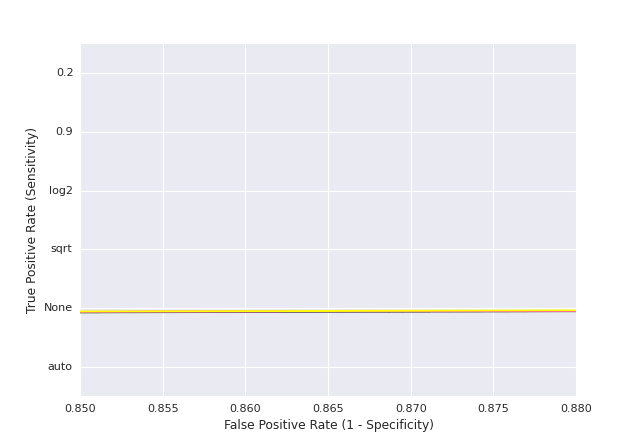

In [93]:
# TASK 7: plot the ROC curve
import matplotlib
%matplotlib nbagg
from sklearn import metrics
import pandas as pd
from ggplot import *


nbm_preds = nbm.predict_proba(X_test)[:,1]
nbm_fpr, nbm_tpr, _ = metrics.roc_curve(y_test, nbm_preds)

nbg_preds = nbg.predict_proba(X_test)[:,1]
nbg_fpr, nbg_tpr, _ = metrics.roc_curve(y_test, nbg_preds)

nbb_preds = nbb.predict_proba(X_test)[:,1]
nbb_fpr, nbb_tpr, _ = metrics.roc_curve(y_test, nbb_preds)

plt.plot(nbm_fpr, nbm_tpr, color='green')
plt.plot(nbg_fpr, nbg_tpr, color='magenta')
plt.plot(nbb_fpr, nbb_tpr, color='yellow')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')


### MODEL3: KNN

In [35]:
knn = KNeighborsClassifier(n_neighbors=9)
strongy = data1.FelRecidYr3
knn.fit(X,y)
scores = cross_val_score(knn, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
print scores

[ 0.67305893  0.65668849  0.67539757  0.6499766   0.67150211  0.70425831
  0.67945718  0.68928404  0.65418811  0.63313056]


In [36]:
# use average accuracy as an estimate of out-of-sample accuracy
print scores.mean()

0.668694190688


In [ ]:
# search for an optimal value of K for KNN
k_range = range(1, 100)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
    k_scores.append(scores.mean())
print k_scores

In [ ]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

### MODEL3: KNN - Re-run KNN model with optimized K = 40

In [37]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=40)
strongy = data1.FelRecidYr3
knn_scores = cross_val_score(knn, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
print knn_scores

[ 0.6950421   0.70813845  0.71094481  0.6888161   0.71736079  0.68366869
  0.71127749  0.70987365  0.69209172  0.68132897]


In [38]:
import math
mean_score = knn_scores.mean()
std_dev = knn_scores.std()
std_error = knn_scores.std() / math.sqrt(scores.shape[0])
ci =  2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print "Score is %f +/-  %f" % (mean_score, ci)
print '95 percent probability that if this experiment were repeated over and over the average score would be between %f and %f' % (lower_bound, upper_bound)

Score is 0.699854 +/-  0.008875
95 percent probability that if this experiment were repeated over and over the average score would be between 0.690979 and 0.708729


### MODEL 4: Logistic Regression

#### MODEL 4: Logistic Regression - 10-fold cross-validation with logistic regression

In [39]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X,y)
logreg_scores = cross_val_score(logreg, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
logreg_auc_scores = cross_val_score(logreg, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc')

[ 0.72263798  0.70720299  0.70533209  0.70379036  0.68039307  0.69068788
  0.69489939  0.70940571  0.69630323  0.69957885]


#### MODEL 4: Logistic Regression - Print Logistic Regression cross validation accuracy scores

print logreg_scores

#### MODEL 4: Logistic Regression - Print Logistic Regression cross validation accuracy score - mean

In [40]:
print cross_val_score(logreg, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()

0.700884741336


#### MODEL 4: Logistic Regression - Print Logistic Regression cross validation auc score - mean

In [ ]:
print logreg_auc_scores.mean()

In [42]:
mean_score = logreg_scores.mean()
std_dev = logreg_scores.std()
std_error = logreg_scores.std() / math.sqrt(logreg_scores.shape[0])
ci =  2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print "Score is %f +/-  %f" % (mean_score, ci)
print '95 percent probability that if this experiment were repeated over and over the average score would be between %f and %f' % (lower_bound, upper_bound)

Score is 0.701023 +/-  0.007823
95 percent probability that if this experiment were repeated over and over the average score would be between 0.693200 and 0.708846


### MODEL 5: SVM Polynomial Kernel

#### MODEL 5: SVM Polynomial Kernel - 10-fold cross-validation with SVM Poly

In [ ]:
# 10-fold cross-validation with SVM Polynomial
from sklearn import svm
svmpoly = svm.SVC(kernel='poly', gamma=2)
svmpoly.fit(X,y)
svmpoly_scores = cross_val_score(svmpoly, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
print svmpoly_scores

#### MODEL 5: SVM Polynomial Kernel - Search for an optimal gamma/depth for SVM Polynomial

In [ ]:
# search for an optimal gamma for SVM Polynomial
g_range = range(1, 10)
g_scores = []
for k in g_range:
    knn = svm.SVC(kernel='poly', gamma=k)
    scores = cross_val_score(svmpoly, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
    g_scores.append(scores.mean())
print g_scores

#### MODEL 5: SVM Polynomial Kernel - Tune SVM Hyperparameters - C and gamma

In [ ]:
import optunity
import optunity.metrics
import sklearn.svm

# score function: twice iterated 10-fold cross-validated accuracy
@optunity.cross_validated(x=data1[feature_cols2], y=data1.FelRecidYr3, num_folds=10, num_iter=2)
def svm_auc(x_train, y_train, x_test, y_test, logC, logGamma):
    model = sklearn.svm.SVC(C=10 ** logC, gamma=10 ** logGamma).fit(x_train, y_train)
    decision_values = model.decision_function(x_test)
    return optunity.metrics.roc_auc(y_test, decision_values)

# perform tuning
hps, _, _ = optunity.maximize(svm_auc, num_evals=200, logC=[-5, 2], logGamma=[-5, 1])

# train model on the full training set with tuned hyperparameters
optimal_model = sklearn.svm.SVC(C=10 ** hps['logC'], gamma=10 ** hps['logGamma']).fit(data, labels)

#### MODEL 5: SVM Polynomial Kernel - Plotting SVM boundaries

In [ ]:
fignum=1

# plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.svmpoly()

    plt.scatter(svmpoly.support_vectors_[:, 0], svmpoly.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10)
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired)

    plt.axis('tight')
    x_min = -3
    x_max = 3
    y_min = -3
    y_max = 3

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = svmpoly.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1
plt.show()

### MODEL 5: SVM Gaussian Kernel

In [ ]:

# 10-fold cross-validation with SVM Polynomial
from sklearn import svm
svmpoly = svm.SVC(kernel='poly', gamma=2)
svmpoly.fit(X,y)
svmpoly_scores = cross_val_score(svmpoly, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
print svmpoly_scores


### MODEL 6: Decision Tree

#### MODEL 6: Decision Tree - Initial Decision Tree with max depth of 10

In [17]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=10)
clf.fit(X,y)
clf_scores = cross_val_score(clf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')

#### MODEL 6: Decision Tree - Print Decision Tree cross validation accuracy scores

In [18]:
print clf_scores

[ 0.69971936  0.69644528  0.69597755  0.70098269  0.69068788  0.68741226
  0.68975199  0.69770707  0.69770707  0.69723912]


#### MODEL 6: Decision Tree -  Print Decision Tree cross validation accuracy score - mean

In [19]:
clf_scores_mean = cross_val_score(clf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy').mean()
print clf_scores_mean

0.695037455356


#### MODEL 6: Decision Tree - Print Decision Tree cross validation auc score - mean

In [20]:
clf_scores_auc = cross_val_score(clf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
print clf_scores_auc

0.645035075577


#### MODEL 6: Decision Tree - Save and print graphic of Decision Tree

In [44]:
from sklearn.externals.six import StringIO  
import pydot 
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data)
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 

In [45]:
graph.write_jpeg("hw3_tree_plot.jpg")

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.280316 to fit



True

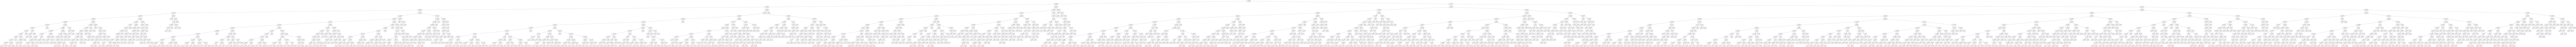

In [46]:
from IPython.display import Image
Image(filename='hw3_tree_plot.jpg')

### MODEL 6: Decision Tree - search for an optimal gamma/depth for Decision Tree

In [54]:
t_range = range(1, 100)
t_scores = []
for k in t_range:
    clf = tree.DecisionTreeClassifier(max_depth=k)
    scores = cross_val_score(clf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
    t_scores.append(scores.mean())
print t_scores

[0.69522231361293041, 0.69690820953637478, 0.69934095820750086, 0.69929396665197308, 0.69863812037279827, 0.69868438965476642, 0.69760837714761481, 0.69424030610391196, 0.69512900900127961, 0.6945693126538387, 0.69129292657804731, 0.69269636976554128, 0.69213444093618914, 0.69091911718034904, 0.68885952129459438, 0.68736222631851041, 0.68712687457347565, 0.68886002469737839, 0.68507047420104505, 0.68783043468173788, 0.68712831912059469, 0.68759703088660618, 0.68731547552083583, 0.68647312945374683, 0.68652016478342959, 0.68497535296195644, 0.68455527428229002, 0.68530304628722938, 0.68717552954689798, 0.68609923250773819, 0.68441475924433548, 0.68703634962067495, 0.6879709278326146, 0.68464960758658644, 0.68656720011311245, 0.68680027560208068, 0.68614642104696388, 0.68572544499711763, 0.68488312081710578, 0.68703483941232324, 0.68506808850959067, 0.68357331054742654, 0.68535132918033326, 0.68450847971046025, 0.68488329591372632, 0.68829901512528369, 0.68347965574253444, 0.686614169781

### MODEL 6: Decision Tree - Plot accuracy of cross validation runs vs. values of depth

<IPython.core.display.Javascript object>


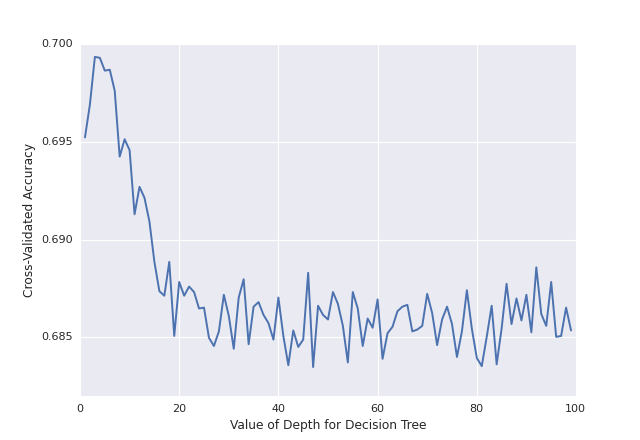

In [55]:
import matplotlib
%matplotlib nbagg
plt.plot(t_range, t_scores)
plt.xlabel('Value of Depth for Decision Tree')
plt.ylabel('Cross-Validated Accuracy')

### MODEL 6: Decision Tree - Model optimization results:

After examining accuracy for a variety of depths, its appears that a value of ~45 for a max depth is optimal in terms of cross validation accuracy.

### MODEL 6: Decision Tree - Re-run Decision Tree model with optimized Depth = 45

In [109]:
estimator_range = range(1, 100)

from sklearn import tree

RMSE_scores = []

for estimator in estimator_range:
    clf = tree.DecisionTreeClassifier(max_depth=estimator)
    clf.fit(X,y)
    MSE_scores = cross_val_score(clf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

### MODEL 6: Decision Tree - Plot N Estimators vs. RMSE

<IPython.core.display.Javascript object>


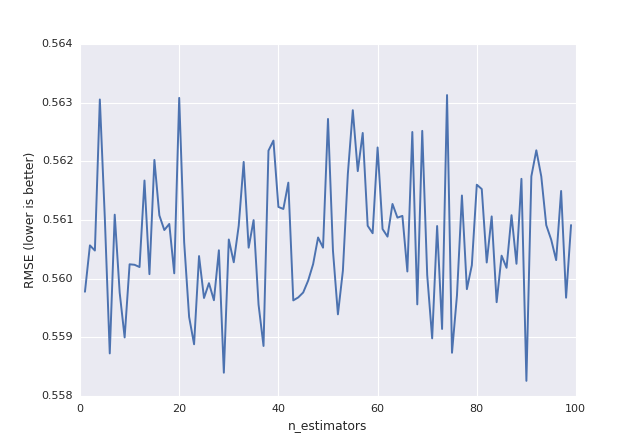

In [110]:
import matplotlib
%matplotlib nbagg

# plot n_estimators (x-axis) versus RMSE (y-axis)
plt.plot(estimator_range, RMSE_scores)
plt.xlabel('n_estimators')
plt.ylabel('RMSE (lower is better)')

### MODEL 7: Bootstrap Aggregation using Decision Tree

In [27]:
bag_scores = []

bag_range = range(1, 100)

for k in bag_range:
    bag_clf = BaggingClassifier(clf, n_estimators=k, max_samples=1.0, max_features=5, bootstrap = False, bootstrap_features = True, random_state=42)
    bag_clf.fit(X, y)
    bag_clf_scores = cross_val_score(bag_clf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
    MSE_scores = cross_val_score(bag_clf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='mean_squared_error')
    bag_scores.append(bag_clf_scores.mean())
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))
print bag_clf_scores

[ 0.70392891  0.70720299  0.69550982  0.69677117  0.68741226  0.69349555
  0.7051942   0.68788021  0.68647637  0.70145063]


<IPython.core.display.Javascript object>


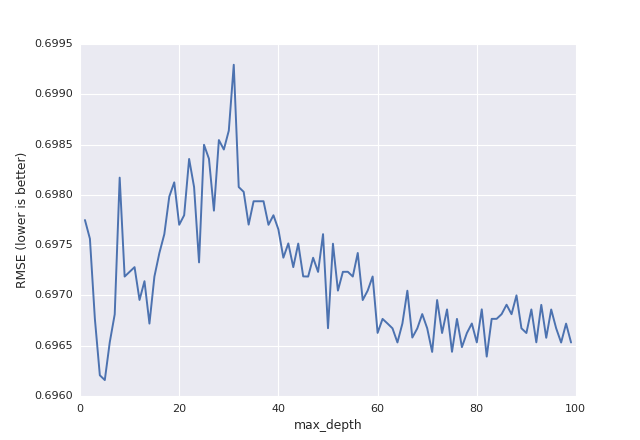

In [28]:
import matplotlib
%matplotlib nbagg
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(bag_range, bag_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

### MODEL 8: Random Forest

In [94]:
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf.fit(X, y)
rf_scores = cross_val_score(rf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
rf_auc_scores = cross_val_score(rf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc')

In [95]:
print rf_scores

[ 0.63125076  0.61601404  0.60727423  0.64962032  0.64854731  0.62610898
  0.62393517  0.65050179  0.64638649  0.61552127]


In [55]:
print rf_scores.mean()

0.687549535928


In [56]:
rf.oob_score_

0.68792401628222521

In [30]:
#y_oob = rf.oob_prediction_
#print "c-stat: ", roc_auc_score(y, y_oob)

### MODEL 8: Random Forest - Find optimal number of leaves

1 min samples
C-stat:  0.633715342268

2 min samples
C-stat:  0.652353286617

3 min samples
C-stat:  0.658274606867

4 min samples
C-stat:  0.66154018628

5 min samples
C-stat:  0.661801889051

6 min samples
C-stat:  0.663049390999

7 min samples
C-stat:  0.663061465666

8 min samples
C-stat:  0.665261433978

9 min samples
C-stat:  0.664549538674

10 min samples
C-stat:  0.664360005504

11 min samples
C-stat:  0.664544078851

12 min samples
C-stat:  0.665364485318

13 min samples
C-stat:  0.665177434573

14 min samples
C-stat:  0.665029887753

15 min samples
C-stat:  0.665848768169

16 min samples
C-stat:  0.665152605098

17 min samples
C-stat:  0.665876244203

18 min samples
C-stat:  0.664861152529

19 min samples
C-stat:  0.664404007211

20 min samples
C-stat:  0.665682358433

21 min samples
C-stat:  0.66485627806

22 min samples
C-stat:  0.665490399749

23 min samples
C-stat:  0.664823141737

24 min samples
C-stat:  0.665172299437

25 min samples
C-stat:  0.664711455146



<IPython.core.display.Javascript object>


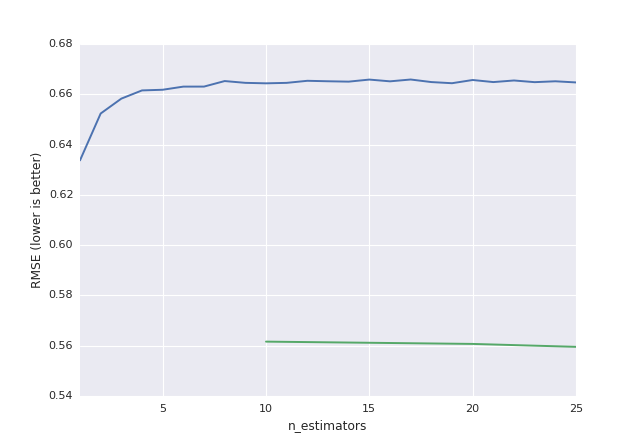

In [104]:
results = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
for min_samples in min_samples_leaf_options:
    rf = RandomForestClassifier(n_estimators=100, 
                                  oob_score=True, 
                                  n_jobs=-1, 
                                  random_state=42, 
                                  max_features="auto", 
                                  min_samples_leaf=min_samples)
    rf.fit(X, y)
    print min_samples, "min samples"
    roc = cross_val_score(rf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
    print "C-stat: ", roc
    results.append(roc)
    print ""

<IPython.core.display.Javascript object>


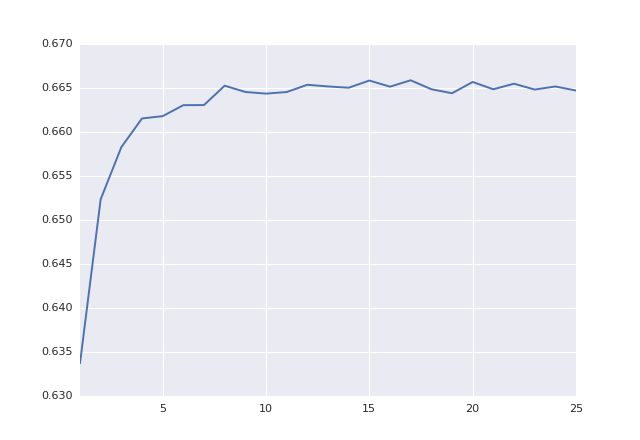

In [111]:
import matplotlib
%matplotlib nbagg

pd.Series(results, min_samples_leaf_options).plot();

### MODEL 8: Random Forest - Most Important Features

<IPython.core.display.Javascript object>


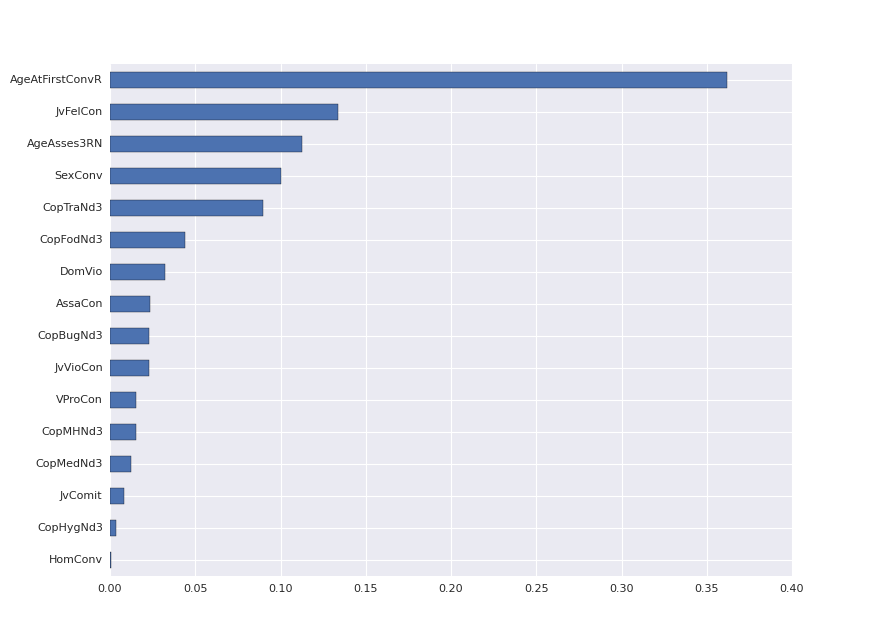

In [116]:
import matplotlib
%matplotlib nbagg

feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.sort()
feature_importances.plot(kind="barh", figsize=(11,8));

### MODEL 8: Random Forest - Determine optimal depth for Random Forest

In [11]:
t_range = range(1, 100)
t_scores = []
results = []
RMSE_scores = []
for k in t_range:
    clf = RandomForestClassifier(max_depth=k)
    scores = cross_val_score(clf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
    clf_auc_scores = cross_val_score(clf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc')
    MSE_scores = cross_val_score(clf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='mean_squared_error')
    t_scores.append(scores.mean())
    results.append(clf_auc_scores)
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))
print t_scores

[0.69522259814493881, 0.69531583709535716, 0.6979844628013796, 0.69990117984480316, 0.69962220715418522, 0.70149208585162393, 0.70144452523207956, 0.69891853761053524, 0.69990225231160375, 0.70107270755843953, 0.69672019954010878, 0.69732802557111051, 0.69569039065369265, 0.69433291032908095, 0.69438044906154772, 0.69232343585094547, 0.68885882090811246, 0.68666032962814294, 0.68745535583354089, 0.68717526690196729, 0.68825246131130735, 0.6862859511664281, 0.68666078925677176, 0.68488465291253531, 0.68839221030154696, 0.6841815743199795, 0.68549188799244276, 0.68525660190864079, 0.6867076057156789, 0.68450904877447682, 0.68904775016163611, 0.68651953005818023, 0.68535014727814492, 0.68525618605416694, 0.68563023620971841, 0.68853220004963989, 0.68839242917232257, 0.68460139035471512, 0.68726946888379836, 0.68652064629913589, 0.68619354392495713, 0.68638063466396559, 0.68488434649344943, 0.68764305941072101, 0.68469500138545203, 0.68521074848114627, 0.68666024207983267, 0.68750252248568

<IPython.core.display.Javascript object>


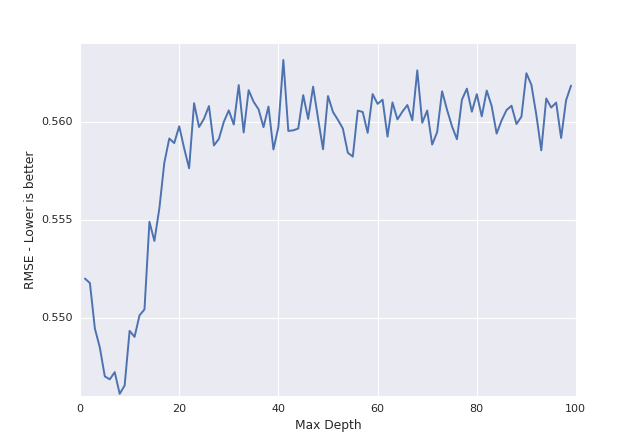

In [15]:
import matplotlib
%matplotlib nbagg
plt.plot(t_range, RMSE_scores)
plt.xlabel('Max Depth')
plt.ylabel('RMSE - Lower is better')

<IPython.core.display.Javascript object>


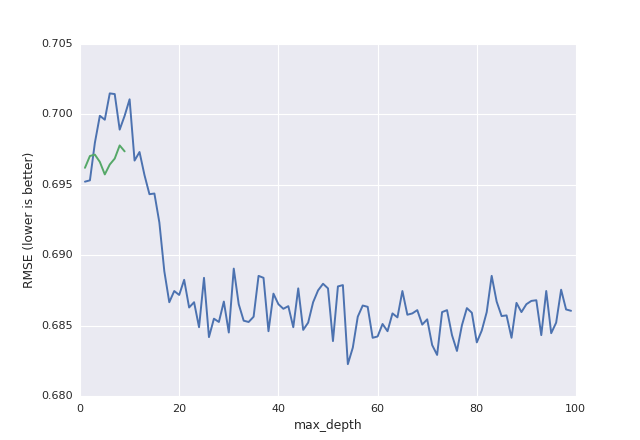

In [16]:
import matplotlib
%matplotlib nbagg
plt.plot(t_range, t_scores)
plt.xlabel('Max Depth')
plt.ylabel('Cross Validated Accuracy')

<IPython.core.display.Javascript object>


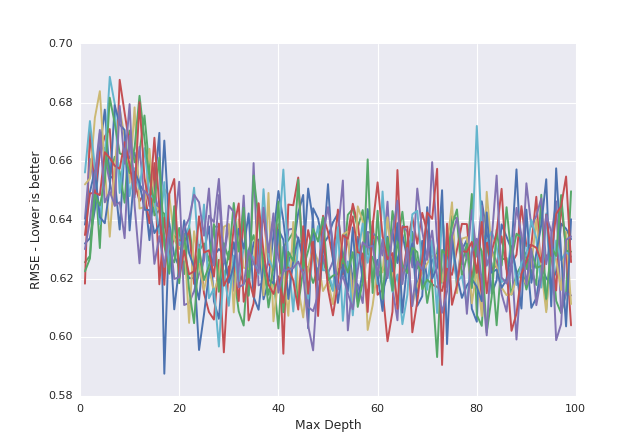

In [14]:
import matplotlib
%matplotlib nbagg
plt.plot(t_range, results)
plt.xlabel('Max Depth')
plt.ylabel('RMSE - Lower is better')

### MODEL 8: Random Forest - Search for an optimal number of estimators

In [35]:
k_range = range(1, 100)
k_scores = []
for k in k_range:
    rf = RandomForestClassifier(n_estimators=k, oob_score=True, random_state=42)
    rf_scores = cross_val_score(rf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
    k_scores.append(rf_scores.mean())
print k_scores

[0.68053148828187759, 0.68408660629043361, 0.68474273710161682, 0.68553612177619772, 0.68614701199805805, 0.68427490081870812, 0.68352585936326982, 0.68722232411872786, 0.6870829253217291, 0.68600597167024224, 0.68539727015613805, 0.68492936821199646, 0.68460351340123871, 0.68418083015934239, 0.68787812662374759, 0.68624060114171759, 0.68993643117192605, 0.68689480589007512, 0.68525677700526122, 0.68862653335393631, 0.68614650859527426, 0.68797053386521845, 0.68506986136287329, 0.68520954469188022, 0.6853053444303735, 0.68736207310896746, 0.69007626771047592, 0.68666107378878016, 0.68675450972289642, 0.68782999694018643, 0.68675490369029268, 0.68633327102811914, 0.68708159020999759, 0.68703409525168602, 0.68745603433294522, 0.68712768439534544, 0.68914098911205435, 0.68642570015666771, 0.68797081839722674, 0.68591257951028095, 0.68736283915668217, 0.68773697686054391, 0.68619308429632819, 0.68638105051843934, 0.68647328266328955, 0.68689452135806683, 0.68792251361704526, 0.688252439424

### MODEL 8: Random Forest - Plot number of estimators with cross-validated accuracy

<IPython.core.display.Javascript object>


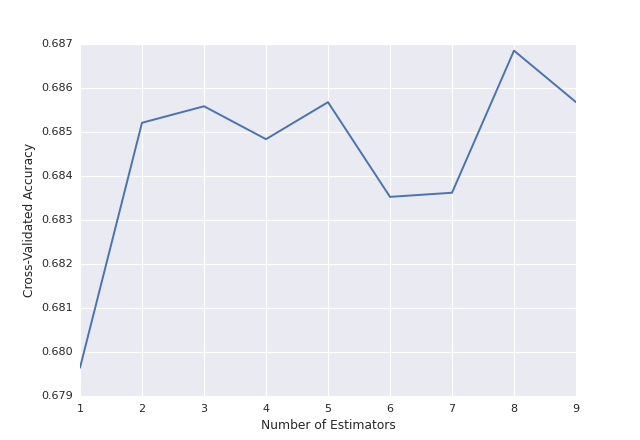

In [115]:
import matplotlib
%matplotlib nbagg
plt.plot(k_range, k_scores)
plt.xlabel('Number of Estimators')
plt.ylabel('Cross-Validated Accuracy')

### MODEL 8: Random Forest - optimize for max number of features

auto option
C-stat:  0.624486336364

None option
C-stat:  0.623431616722

sqrt option
C-stat:  0.627165201257

log2 option
C-stat:  0.625376336671

0.9 option
C-stat:  0.623853600241

0.2 option
C-stat:  0.628901439708



<IPython.core.display.Javascript object>


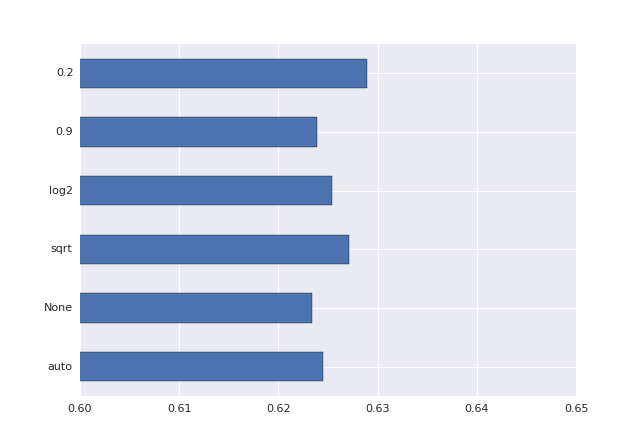

In [99]:
import matplotlib
%matplotlib nbagg

results = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2]

for max_features in max_features_options:
    model = RandomForestClassifier(n_estimators=10, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    model.fit(X, y)
    roc = cross_val_score(model, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc').mean()
    print max_features, "option"
    print "C-stat: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, max_features_options).plot(kind="barh", xlim=(.60,.65));

### MODEL 8: Re-Run Random Forest after optimization of all hyperparameters

In [117]:
rf = RandomForestClassifier(n_estimators=60, max_features=.2, max_depth=50,  oob_score=True, min_samples_leaf=10, random_state=42)
rf.fit(X, y)
rf_scores = cross_val_score(rf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
rf_auc_scores = cross_val_score(rf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='roc_auc')

## MODEL 8a: Bagged Random Forest (using optimized parameters from above)

In [ ]:
rfbag_scores = []

rfbag_range = range(1, 100)
rfRMSE_scores = []

for k in bag_range:
    rfbag_clf = RandomForestClassifier(n_estimators=60, max_features=.2, max_depth=50,  oob_score=True, min_samples_leaf=10, random_state=42)
    rfbag_clf.fit(X, y)
    rfbag_clf_scores = cross_val_score(rfbag_clf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')
    rfMSE_scores = cross_val_score(rfbag_clf, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='mean_squared_error')
    rfbag_scores.append(rfbag_clf_scores.mean())
    rfRMSE_scores.append(np.mean(np.sqrt(-rfMSE_scores)))
print rfbag_clf_scores

<IPython.core.display.Javascript object>


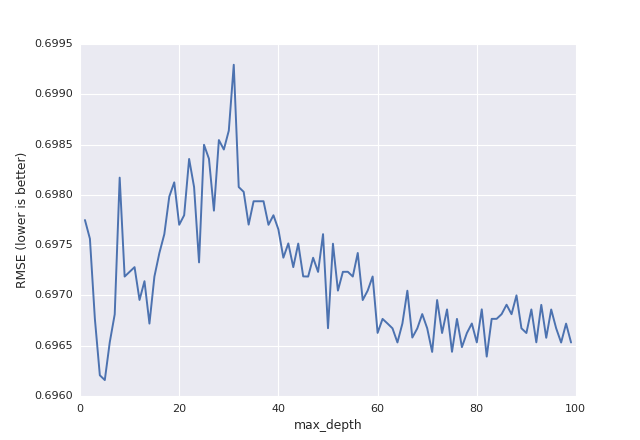

In [28]:
import matplotlib
%matplotlib nbagg
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(rfbag_range, rfbag_scores)
plt.xlabel('N estimators')
plt.ylabel('RMSE (lower is better)')

## MODEL 9:  NOISY REPLICATION

### Summary information for all models - DATA2 - RECIDIVISM

In [14]:
# TASK 7: plot the ROC curve
import matplotlib
%matplotlib nbagg
from sklearn import metrics
import pandas as pd
from ggplot import *

knn_preds = knn.predict_proba(X_test)[:,1]
knn_fpr, knn_tpr, _ = metrics.roc_curve(y_test, knn_preds)

nbm_preds = nbm.predict_proba(X_test)[:,1]
nbm_fpr, nbm_tpr, _ = metrics.roc_curve(y_test, nbm_preds)

nbg_preds = nbg.predict_proba(X_test)[:,1]
nbg_fpr, nbg_tpr, _ = metrics.roc_curve(y_test, nbg_preds)

nbb_preds = nbb.predict_proba(X_test)[:,1]
nbb_fpr, nbb_tpr, _ = metrics.roc_curve(y_test, nbb_preds)

logreg_preds = logreg.predict_proba(X_test)[:,1]
logreg_fpr, logreg_tpr, _ = metrics.roc_curve(y_test, logreg_preds)

clf_preds = clf.predict_proba(X_test)[:,1]
clf_fpr, clf_tpr, _ = metrics.roc_curve(y_test, clf_preds)

bag_clf_preds = bag_clf.predict_proba(X_test)[:,1]
bag_fpr, bag_tpr, _ = metrics.roc_curve(y_test, bag_clf_preds)

rf_clf_preds = rf_clf.predict_proba(X_test)[:,1]
rf_fpr, rf_tpr, _ = metrics.roc_curve(y_test, rf_clf_preds)

plt.plot(knn_fpr, knn_tpr, color='blue') # KNN
plt.plot(logreg_fpr, logreg_tpr, color='red') # Logistic Regression
plt.plot(nbm_fpr, nbm_tpr, color='green') # Naive Bayes Multinomial
plt.plot(nbg_fpr, nbg_tpr, color='magenta') # Naive Bayes Gaussian
plt.plot(nbb_fpr, nbb_tpr, color='yellow') # Naive Bayes Bernoulli
plt.plot(clf_fpr, clf_tpr, color='orange') # Decision Tree
plt.plot(bag_fpr, bag_tpr, color='black') # Bagged Decision Tree
plt.plot(rf_fpr, rf_tpr, color='brown')


plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')




NameError: name 'knn' is not defined

# DATA2 STEP 1: DATA LOADING - Music

In [48]:
urllib.urlretrieve('http://www.webpages.uidaho.edu/erichs/music.json', '/git/data/hw3/music.json')

('/git/data/hw3/music.json', <httplib.HTTPMessage instance at 0x7f0a69bf8050>)

In [49]:
with open('/git/data/hw3/music.json', 'rU') as f:
    data = [json.loads(row) for row in f]
    data2 = pd.DataFrame(data)

## Converting helpfulness rating into a percentage

In [152]:
helpfulness_ratio = data2.helpful.tolist()
helpfulness_ratio_final = pd.DataFrame(helpfulness_ratio)

In [153]:
helpfulness_ratio_final['helpfulness_ratio'] = helpfulness_ratio_final[0] / helpfulness_ratio_final[1]

## Preparing X and y: adding helpfulness ratio as a column, eliminating rows where helpfulness ratio is NAN.

In [169]:
data2 = pd.DataFrame(data)
data2 = pd.concat([data2, helpfulness_ratio_final], axis=1)
feature_cols = ['helpfulness_ratio', 'reviewText', 'unixReviewTime', 'summary']
#feature_cols = ['reviewText']
music_best_worst = data2[(data2.overall==5) | (data2.overall==1)]
music_best_worst = music_best_worst[np.isfinite(music_best_worst['helpfulness_ratio'])]
music_best_worst_featureadd = music_best_worst[feature_cols] #for use in Task 6

#--Setting X and y for music
X = music_best_worst_featureadd
y = music_best_worst.overall

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

In [171]:
X

helpfulness_ratio                                         reviewText  \
4                0.000000  How many Nocturnes does it contain? All of the...   
8                0.000000  I was looking for a concert, not instructions ...   
9                0.125000  If you are an unabashed EC fan (as I am), you ...   
12               1.000000  Unless you are someone who dosen't have a clue...   
13               1.000000  I've played guitar for over 40 years, but it's...   
16               0.387097  THIS IS NOT A CLAPTON CONCERT!!! IT'S AN INSTR...   
17               1.000000  For those who may not know the Hal Leonard pub...   
18               0.000000  No EC collection would be considered complete ...   
19               1.000000  Very disappointing. This was advertised to be ...   
22               1.000000  So, you have a pile of guitar instruction book...   
26               1.000000  This was a very pleasant suprize i really enjo...   
28               0.933333  Mat and would not hit it off.  Instant persona...   
32               1.000000  I am a professional musician with over 17 year...   
33               1.000000  My Background:In order to level set you as to ...   
35               1.000000  After performing bottleneck gospel/blues profe...   
36               1.000000  This is a two CD set each CD is 30 minutes lon...   
37               1.000000  The Discovery CD has songs for singing and mov...   
46               1.000000  This was terrible. It gets right to the part y...   
52               1.000000  If you have not seen Simmon Phillips play, thi...   
53               1.000000  This DVD is the complete set of what had previ...   
55               1.000000  I imagine Simon Phillips needs no introduction...   
58               0.000000  John Patitucci is not only an amazing player, ...   
64               0.800000  This is not what you're thinking.  This DVD is...   
65               0.944444  I own every Paul Gilbert video that I am aware...   
66               0.750000  I'd already seen a few of the lessons online a...   
68               0.954545  I just got this dvd a few weeks back and I can...   
70               0.666667  There'd be a lot more amazing guitarists in th...   
71               1.000000  Within a month I have already notice some seri...   
72               0.800000  Paul's ability to teach is amazing.  VERY rele...   
80               0.857143  Anyone interested in improving their picking a...   
...                   ...                                                ...   
189570           1.000000  I bought this product for only one reason: I h...   
189572           1.000000  Sorry for the weak pun. I have never tried any...   
189574           0.800000  I've been playing guitar for 50+ years. The TM...   
189578           1.000000  I have been writing and playing music for 16 y...   
189579           1.000000  I got this mainly to get a pre-amp sorta thing...   
189581           1.000000  This is a great sounding pedal - I was shocked...   
189583           0.333333  very good pedal tube is great sound is amazing...   
189584           1.000000  I bought this pedal all excited about the visi...   
189585           0.875000  Folks that like the original Ibanez Tube King ...   
189589           1.000000  I was trying to make my crappy Fender FM212R a...   
189590           1.000000  I recently switched back to guitar after movin...   
189596           1.000000  This is a great base OD/distortion pedal. Open...   
189598           1.000000  I really love this pedal especially the price....   
189602           0.875000  With some trials using different tubes this pe...   
189603           1.000000  With the stock tube, this pedal makes for a go...   
189604           1.000000  most of the other behringer stuff may be junk,...   
189609           1.000000  This is clearly the best distortion pedal I've...   
189611           0.750000  As others have stated, ditch the stock tube fo...   
189615  

## Vectorizing Reviewtext

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
X_dtm = vect.fit_transform(X)
train_dtm = vect.fit_transform(X_train.reviewText)
test_dtm = vect.transform(X_test.reviewText)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
X_dtm = transformer.fit_transform(X)

In [58]:
#X_reviewtext = vect.fit_transform(X.reviewText)

In [59]:
#X_reviewtext= sp.issparse(X_reviewtext)

# STEP 2: FEATURE EXTRACTION

## DATA2 Feature Extraction - Music

### Linear Regression - 10-fold cross-validation with all three features

In [68]:
lm = LinearRegression()
scores = cross_val_score(lm, X_dtm, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='mean_squared_error')
print scores

ValueError: Found arrays with inconsistent numbers of samples: [     1 131960]

# DATA1 STEP 4 : MODEL EVALUATION - Recidivism

### MODEL 1: Null Accuracy

In [82]:
# calculate the null accuracy
y_test.value_counts().head(1) / len(y_test)

0    0.698353
dtype: float64

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nbm = MultinomialNB()
nbm.fit(X, y)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
nbm_scores = cross_val_score(nbm, X, y, cv=KFold(X.shape[0], n_folds=10, shuffle=True), scoring='accuracy')

#print(clf.predict(X[2:3]))